# Consultas SQL sobre Pokemon

## Introducción
Existen más de 1.000 especies de pokemon distintas, cada una con sus características y particularidades. 

A nivel competitivo es fácil sentirse abrumado con la inmensa cantidad de combinaciones y estrategias distintas que se pueden crear. 

Cuando uno busca la forma de optimizar a su equipo pokemon pueden surgir preguntas cómo "¿qué pokemon puedo añadir al equipo que sea de tipo fuego, sea capaz de hacer el ataque "envite igneo" y tenga unos stats de ataque elevados?". 

Encontrar respuesta a este tipo de preguntas puede convertirse en un proceso largo y tedioso si se consulta manualmente. Es por esto por lo que decidí emplear mis conocimientos en SQL para hacer este proyecto. Más abajo se encuentran diferentes preguntas que he propuesto, pero pueden ser modificadas para adaptarse a las dudas que tengan otros. De esta forma buscar al pokemon óptimo para tu estrategia se convierte en un proceso mucho más rápido y práctico.  

Hay varias bases de datos públicas, pero hay una que me sorprendió bastante por lo completa que está. Es la que he utilizado para el proyecto, no he llegado a utilizar todos sus archivos CSV, solo los necesarios para las consultas que realicé. 
Fuente de los datos: https://github.com/PokeAPI/pokeapi/tree/master/data/v2/csv. 

Incluye información de todas las generaciones hasta pokemon escarlata y púrpura.

## Descripción de los datos

A continuación describo brevemente las ficheros csv que usaremos: 
| Nombre_fichero | Nº registros | Descripción |
|---|---|---|
| abilities.csv | 367 | Nombre de todas las habilidades que hay. |
| ability_names.csv | 3039 | Nombres de las habilidades en diferentes idiomas. Nos permitirá buscar el nombre de la habilidad en español. |
| machines.csv | 2102 | Números de las distintas máquinas para aprender ataques y el ataque que enseñan. |
| move_names.csv | 8910 | Nombres de los movimientos en diferentes idiomas. Nos permitirá buscar el nombre del movimiento en español. |
| moves.csv | 937 | Todos los movimientos, su poder, precisión, tipo y demás. |
| pokemon_abilities.csv | 2917 | Todas las habilidades que puede llegar a tener cada pokemon. |
| pokemon_moves.csv | 609926 | Todos los movimientos que puede llegar a tener cada pokemon. |
| pokemon_species.csv | 1025 | Nombre de cada pokemon, junto con otros datos como color o si es legendario. |
| pokemon_stats.csv | 7812 | Las estadísticas de combate de cada pokemon. Incluye estadísticas de variaciones como megaevoluciones u otros estados. |
| pokemon_types.csv | 2028 | Los tipos de cada pokemon (primario y secundario). |
| stats.csv | 8 | Los diferentes stats que existen. |
| type_names.csv | 210 | Nombres de los tipos en diferentes idiomas. Nos permitirá buscar el nombre del tipo en español. |
| types.csv | 21 | Nombre de todos los tipos que hay. |

## Diagrama de relaciones (simplificado)
En el siguiente diagrama se muestran las relaciones de las tablas. Para facilitar la comprensión se omiten las columnas que no se llegan a emplear. 

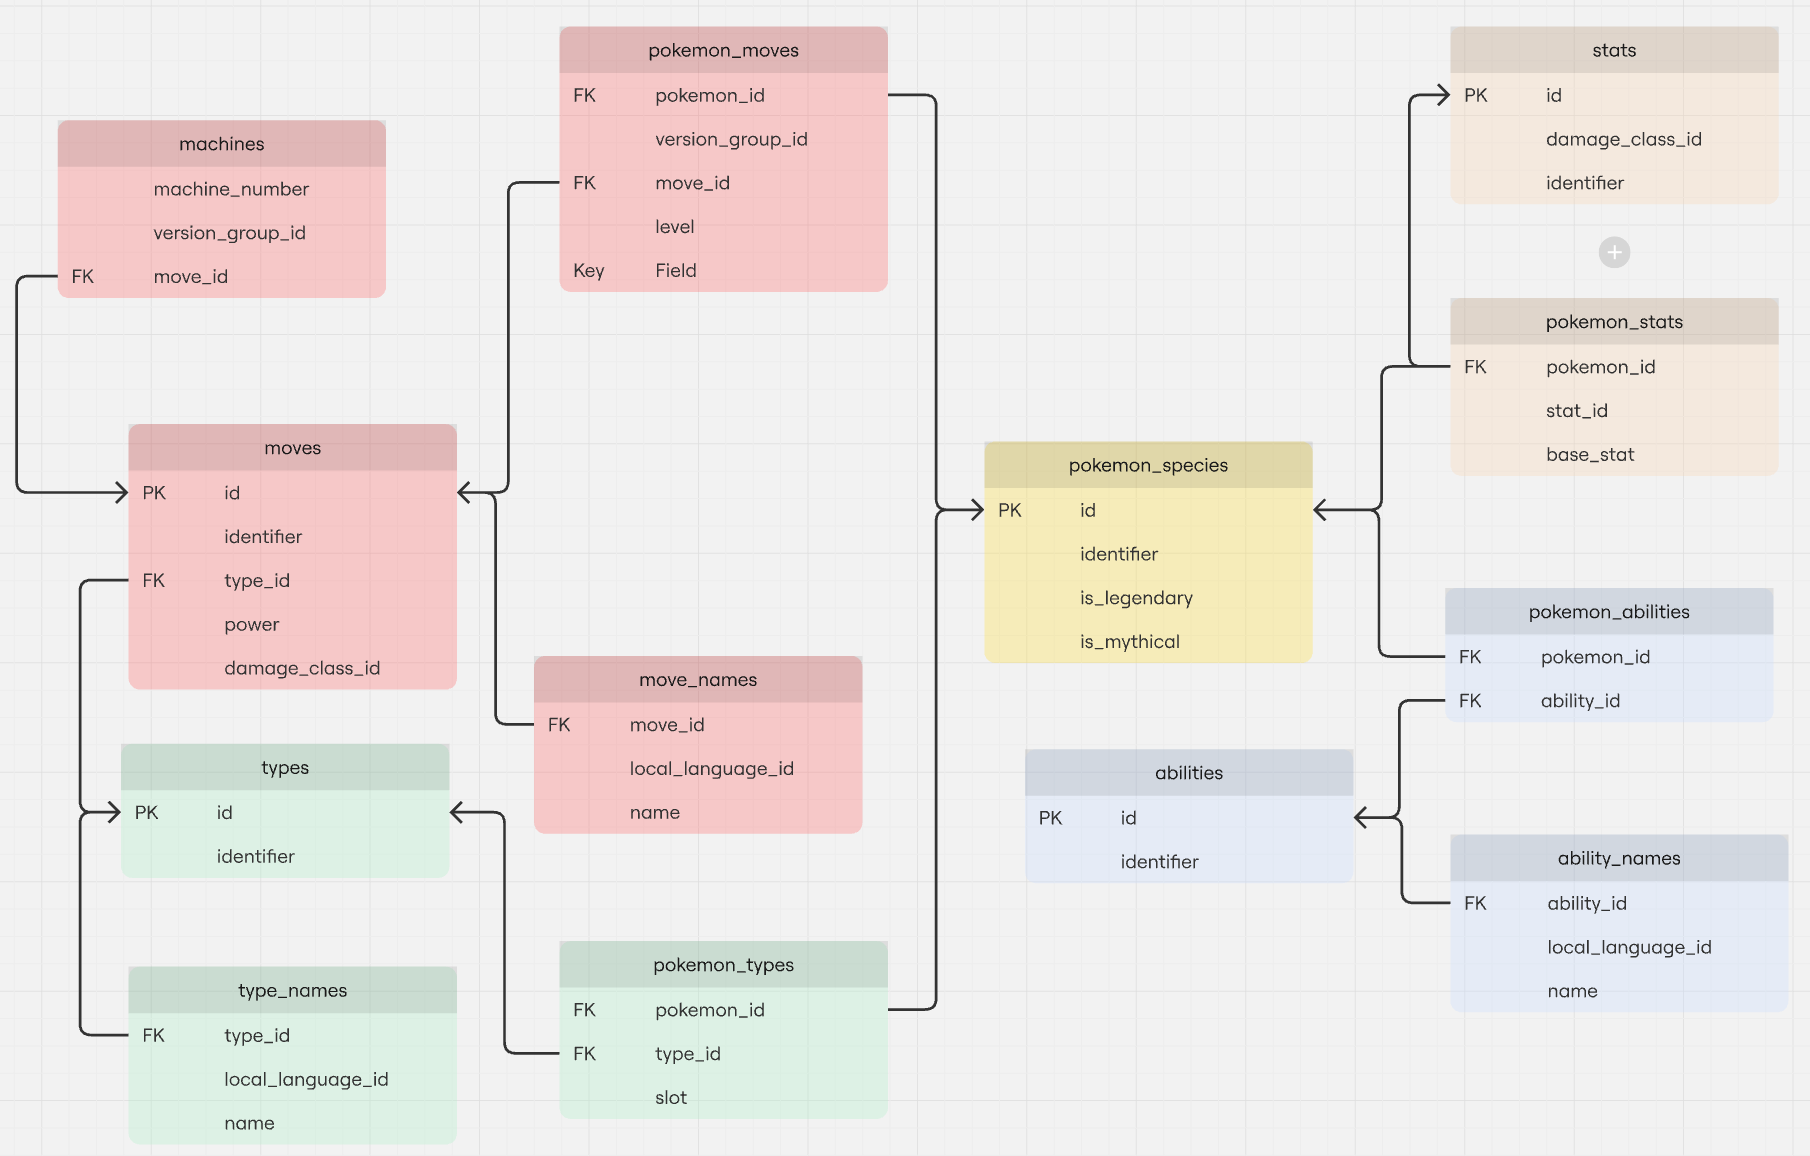

## Metodología
Cargamos los datos de los csv como dataframes usando la librería de pandas. Para las consultas usaremos sqlite3. 

Crearemos una conexión SQL con la base de datos SQLite y procederemos con las consultas. 

In [ ]:
# Instalamos pandas y ipython-sql para trabajar los datos
!pip install pandas
!pip install ipython-sql prettytable 
!pip install prettytable 

In [2]:
# Cargar librerias pandas y sqlite3  
import sqlite3
import pandas as pd
import prettytable

prettytable.DEFAULT = 'DEFAULT'

In [3]:
# Crear la conexión SQL con la base de datos SQLite. Le daremos el nombre PokemonDB a la base de datos creada
con = sqlite3.connect("PokemonDB.db")
cur = con.cursor()

In [4]:
# Para hacer las consultas SQL cargamos SQL magic
%load_ext sql

In [5]:
%sql sqlite:///PokemonDB.db

In [28]:
# Cargamos los archivos csv con los datos 
df_pokemon = pd.read_csv('csv/pokemon.csv')
df_abilities = pd.read_csv('csv/abilities.csv')
df_machines = pd.read_csv('csv/machines.csv')
df_move_names = pd.read_csv('csv/move_names.csv')
df_moves = pd.read_csv('csv/moves.csv')
df_pokemon_abilities = pd.read_csv('csv/pokemon_abilities.csv')
df_ability_names = pd.read_csv('csv/ability_names.csv')
df_pokemon_moves = pd.read_csv('csv/pokemon_moves.csv')
df_pokemon_stats = pd.read_csv('csv/pokemon_stats.csv')
df_pokemon_types = pd.read_csv('csv/pokemon_types.csv')
df_stats = pd.read_csv('csv/stats.csv')
df_type_names = pd.read_csv('csv/type_names.csv')
df_types = pd.read_csv('csv/types.csv')
df_pokemon_species = pd.read_csv('csv/pokemon_species.csv')

In [ ]:
# Establecer conexión entre el módulo SQL magic y la base de datos
df_pokemon.to_sql('pokemon',con)
df_abilities.to_sql('abilities',con)
df_machines.to_sql('machines',con)
df_move_names.to_sql('move_names',con)
df_moves.to_sql('moves',con)
df_pokemon_abilities.to_sql('pokemon_abilities',con)
df_ability_names.to_sql('ability_names',con)
df_pokemon_moves.to_sql('pokemon_moves',con)
df_pokemon_stats.to_sql('pokemon_stats',con)
df_pokemon_types.to_sql('pokemon_types',con)
df_stats.to_sql('stats',con)
df_type_names.to_sql('type_names',con)
df_types.to_sql('types',con)
df_pokemon_species.to_sql('pokemon_species',con)

# Consultas SQL realizadas

## 1. Pokemon con mayor ataque especial [STATS]

Observaciones:
- Los stats se recogen mediante codificación ordinal, por lo que en lugar de buscar al pokemon con ataque especial más alto, tendremos que averiguar antes cuales son los valores numéricos para cada tipo de stat. 
- Trabajar con la tabla "pokemon_species" que recoge el nombre de los pokemon, la tabla "stats" para saber qué tipos de stats hay y "pokemon_stats" para sacar los stats de cada pokemon

In [5]:
# Categorías de los stats antes de la codificación ordinal
%sql SELECT id, identifier FROM stats LIMIT 6;

 * sqlite:///PokemonDB.db
Done.


id,identifier
1,hp
2,attack
3,defense
4,special-attack
5,special-defense
6,speed


Solo me interesa el ataque especial (valor numérico: 4), por lo que filtro los resultados para solo sacar ese stat de los pokemon. 

In [19]:
%%sql 
SELECT pokemon_id, stat_id, base_stat 
FROM pokemon_stats 
WHERE stat_id = 4 
LIMIT 5;

 * sqlite:///PokemonDB.db
Done.


pokemon_id,stat_id,base_stat
1,4,65
2,4,80
3,4,100
4,4,60
5,4,80


Me gustaría que indicase el nombre del pokemon, por su id no me queda claro qué pokemon es. Hay que añadir la columna "identifier" de la tabla "pokemon".

In [54]:
%%sql 
SELECT pokemon_species.identifier, max(pokemon_stats.base_stat)
FROM pokemon_stats, pokemon_species
WHERE pokemon_stats.pokemon_id = pokemon_species.id and pokemon_stats.stat_id = 4;

 * sqlite:///PokemonDB.db
Done.


identifier,max(pokemon_stats.base_stat)
xurkitree,173


El pokemon con el ataque especial más alto es **xurkitree**. Me gustaría saber cuáles son los siguientes pokemon después de xurkitree. 

## 2. Los 10 pokemon con el ataque especial más alto [STATS]

In [22]:
%%sql 
SELECT pokemon_species.identifier, pokemon_stats.base_stat
FROM pokemon_stats, pokemon_species
WHERE pokemon_stats.pokemon_id = pokemon_species.id 
AND pokemon_stats.stat_id = 4
ORDER BY pokemon_stats.base_stat DESC
LIMIT 10;

 * sqlite:///PokemonDB.db
Done.


identifier,base_stat
xurkitree,173
mewtwo,154
blacephalon,151
kyogre,150
rayquaza,150
deoxys,150
dialga,150
palkia,150
reshiram,150
hoopa,150


En la lista aparecen pokemons legendarios. Quiero filtrarlo apra que no salgan. 

## 3. Los 10 pokemon no legendarios con el ataque especial más alto [STATS]
La columna "is_default" de la tabla "pokemon" indica si el pokemon está alterado o en su forma original. Filtramos con esa columna, buscando solo filas con el valor "1". 
Las columnas "is_legendary" y "is_mythical" de la tabla "pokemon_species" nos indican si es especial. Filtramos esas columnas, buscando solo filas con el valor 0. 

In [28]:
%%sql 
SELECT 
    pokemon_species.identifier AS Nombre, 
    pokemon_stats.base_stat AS Atq_Sp
FROM pokemon_species, pokemon_stats
WHERE pokemon_stats.pokemon_id = pokemon_species.id 
AND pokemon_stats.stat_id = 4 
AND pokemon_species.is_legendary = 0 
AND pokemon_species.is_mythical = 0
ORDER BY pokemon_stats.base_stat DESC
LIMIT 10;

 * sqlite:///PokemonDB.db
Done.


Nombre,Atq_Sp
xurkitree,173
blacephalon,151
chandelure,145
vikavolt,145
cursola,145
iron-moth,140
pheromosa,137
raging-bolt,137
hatterene,136
alakazam,135


## 4. Pokemon comunes con defensas física y especial de al menos 100 puntos [STATS]
- Tabla pokemon_species para sacar el nombre de cada pokemon.
- Tabla pokemon_stats para sacar los stats de defensa y def sp. 
- La tabla pokemon_stats es de formato largo, por lo que no hay una columna para la defensa y otra para la defensa especial, se recogen todos los stats en la misma columna. 
- La columna stat_id recoge el tipo de stat y la columna base_stat indica el valor de dicho stat. 
- Usar MAX() y HAVING para poder trabajar con la tabla de formato largo.
- MAX(CASE WHEN stat_id = 3 THEN base_stat END) extrae el valor de Defensa.
- HAVING asegura que ambos stats sean ≥100.
- ORDER BY (Defensa + Def_Sp) DESC ordena por la suma total de ambas defensas.

In [56]:
%%sql
SELECT 
    pokemon_species.identifier AS Nombre,
    MAX(CASE WHEN stat_id = 3 THEN pokemon_stats.base_stat END) AS Defensa,
    MAX(CASE WHEN stat_id = 5 THEN pokemon_stats.base_stat END) AS Def_Sp
FROM pokemon_species, pokemon_stats 
WHERE pokemon_stats.stat_id IN (3, 5)
AND pokemon_stats.pokemon_id = pokemon_species.id 
AND pokemon_species.is_legendary = 0 
AND pokemon_species.is_mythical = 0
GROUP BY pokemon_id
HAVING 
    MAX(CASE WHEN pokemon_stats.stat_id = 3 THEN pokemon_stats.base_stat END) >= 100
    AND
    MAX(CASE WHEN pokemon_stats.stat_id = 5 THEN pokemon_stats.base_stat END) >= 100
ORDER BY (Defensa + Def_Sp) DESC
LIMIT 10;

 * sqlite:///PokemonDB.db
Done.


Nombre,Defensa,Def_Sp
shuckle,230,230
stakataka,211,101
bastiodon,168,138
carbink,150,150
probopass,145,150
toxapex,152,142
aegislash,140,140
dusknoir,135,135
pyukumuku,130,130
dusclops,130,130


## 5. Saber si un movimiento se puede aprender por MT en la edición "Escarlata y Púrpura" [MOVE]

- Esta consulta es para sacar el id del ataque, poniendo el nombre del ataque en español.
- Cada movimiento tiene su número identificativo, pero es más práctico buscar el ataque por su nombre en español.
- Usar tabla "move_names" para que traduzca el ataque y tabla "moves" para coger su id.

In [56]:
# Esta consulta es para sacar el id del ataque, poniendo el nombre del ataque en español
%sql SELECT move_id FROM move_names WHERE local_language_id = 7 AND name = 'Lanzallamas';

 * sqlite:///PokemonDB.db
Done.


move_id
53


In [57]:
%%sql
SELECT 
    machines.machine_number AS Numero_MT, 
    move_names.name AS Nombre_ataque
FROM machines, move_names
WHERE machines.move_id = move_names.move_id
AND move_names.local_language_id = 7
AND machines.version_group_id = 25
AND move_names.move_id= (SELECT move_id FROM move_names WHERE local_language_id = 7 AND name = 'Lanzallamas')
LIMIT 5;

 * sqlite:///PokemonDB.db
Done.


Numero_MT,Nombre_ataque
125,Lanzallamas


El movimiento "lanzallamas" está disponible como MT en Pokemon Escarlata y Púrpura, concretamente en la MT 125. 

## 6. Pokemon con el movimiento "Recuperación", de edición "Escarlata y Púrpura", ordenado por PS más altos [MOVES, STATS]
- Usar tabla "pokemon_species" para los nombres. 
- tabla "pokemon_moves" para saber qué pokemons aprenden "recuperación". 
- tabla "pokemon_stats" para ordenar los resultados por cantidad de PS. 
- Usar columna "version_group_id" de la tabla "pokemon_moves" con el valor 25 para especificar que sean de la generación 9 (Escarlata y Púrpura). 
- Usar tabla "move_names" para que traduzca el ataque, tabla "moves" para coger su id y tabla "pokemon_moves" para saber quienes lo aprenden. 

In [60]:
%%sql SELECT pokemon_species.identifier AS Nombre, pokemon_stats.base_stat AS PS
FROM pokemon_species
JOIN pokemon_moves ON pokemon_species.id = pokemon_moves.pokemon_id
JOIN pokemon_stats ON pokemon_species.id = pokemon_stats.pokemon_id
WHERE pokemon_moves.move_id = (SELECT move_id FROM move_names WHERE local_language_id = 7 AND name = 'Recuperación')
AND pokemon_moves.version_group_id = 25
AND pokemon_stats.stat_id = 1
ORDER BY pokemon_stats.base_stat DESC
LIMIT 10;

 * sqlite:///PokemonDB.db
Done.


Nombre,PS
eternatus,140
arceus,120
gastrodon,111
reuniclus,110
appletun,110
mewtwo,106
lugia,106
ho-oh,106
hydrapple,106
garganacl,100


Podemos hacer algunos ajustes para saber:
- A qué nivel aprende el ataque?
- Omitir pokemon legendarios. 
- Añadir una columna que nos indique si es aprendizaje por movimiento huevo (Mov_huevo).
- Dejar solo los pokemon que tengan al menos 100 de PS.

In [61]:
%%sql 
SELECT 
    pokemon_species.identifier AS Nombre, 
    pokemon_moves.level AS Nivel_aprendizaje, 
    pokemon_stats.base_stat AS PS,
    CASE 
        WHEN pokemon_moves.level = 0 THEN 'Sí'
        ELSE 'No'
    END AS Mov_huevo
FROM pokemon_species
JOIN pokemon_moves ON pokemon_species.id = pokemon_moves.pokemon_id
JOIN pokemon_stats ON pokemon_species.id = pokemon_stats.pokemon_id
WHERE pokemon_moves.move_id = (
    SELECT move_id 
    FROM move_names 
    WHERE local_language_id = 7 AND name = 'Recuperación'
)
AND pokemon_moves.version_group_id = 25
AND pokemon_stats.stat_id = 1
AND pokemon_species.is_legendary = 0 
AND pokemon_species.is_mythical = 0
AND PS >= 100
ORDER BY pokemon_stats.base_stat DESC
LIMIT 50;

 * sqlite:///PokemonDB.db
Done.


Nombre,Nivel_aprendizaje,PS,Mov_huevo
gastrodon,1,111,No
reuniclus,1,110,No
appletun,24,110,No
hydrapple,36,106,No
garganacl,30,100,No


Podemos hacer que indique si se puede aprender por MT y qué MT necesitas. 

In [63]:
%%sql
SELECT 
  pokemon_species.identifier AS Nombre, 
  pokemon_moves.level AS Nivel_aprendizaje, 
  pokemon_stats.base_stat AS PS,
  CASE 
    WHEN pokemon_moves.level = 0 THEN 'Sí'
    ELSE NULL
  END AS Mov_huevo,
  machines.machine_number AS Numero_MT
FROM pokemon_species
JOIN pokemon_moves 
  ON pokemon_species.id = pokemon_moves.pokemon_id
JOIN pokemon_stats 
  ON pokemon_species.id = pokemon_stats.pokemon_id
LEFT JOIN machines 
  ON pokemon_moves.move_id = machines.move_id 
  AND machines.version_group_id = 25
WHERE pokemon_moves.move_id = (
    SELECT move_id 
    FROM move_names 
    WHERE local_language_id = 7 AND name = 'Recuperación'
)
AND pokemon_moves.version_group_id = 25
AND pokemon_stats.stat_id = 1
AND pokemon_species.is_legendary = 0 
AND pokemon_species.is_mythical = 0
AND PS >= 100
ORDER BY pokemon_stats.base_stat DESC
LIMIT 5;

 * sqlite:///PokemonDB.db
Done.


Nombre,Nivel_aprendizaje,PS,Mov_huevo,Numero_MT
gastrodon,1,111,None,None
reuniclus,1,110,None,None
appletun,24,110,None,None
hydrapple,36,106,None,None
garganacl,30,100,None,None


Resulta que no hay MT para el movimiento recuperación. Y si en vez de "recuperación" buscamos para el movimiento "rayo"?

In [65]:
%%sql
SELECT 
  pokemon_species.identifier AS Nombre, 
  pokemon_moves.level AS Nivel_aprendizaje, 
  pokemon_stats.base_stat AS PS,
  CASE 
    WHEN pokemon_moves.level = 0 THEN 'Sí'
    ELSE NULL
  END AS Mov_huevo,
  machines.machine_number AS Numero_MT
FROM pokemon_species
JOIN pokemon_moves 
  ON pokemon_species.id = pokemon_moves.pokemon_id
JOIN pokemon_stats 
  ON pokemon_species.id = pokemon_stats.pokemon_id
LEFT JOIN machines 
  ON pokemon_moves.move_id = machines.move_id 
  AND machines.version_group_id = 25
WHERE pokemon_moves.move_id = (
    SELECT move_id 
    FROM move_names 
    WHERE local_language_id = 7 AND name = 'Rayo'
)
AND pokemon_moves.version_group_id = 25
AND pokemon_stats.stat_id = 1
AND pokemon_species.is_legendary = 0 
AND pokemon_species.is_mythical = 0
AND PS >= 100
ORDER BY pokemon_stats.base_stat DESC
LIMIT 5;

 * sqlite:///PokemonDB.db
Done.


Nombre,Nivel_aprendizaje,PS,Mov_huevo,Numero_MT
blissey,0,255,Sí,126
chansey,0,250,Sí,126
snorlax,0,160,Sí,126
iron-hands,0,154,Sí,126
slaking,0,150,Sí,126


### 7. Pokemon con el movimiento "esfuerzo" y "ataque rápido" [MOVE]

In [149]:
%%sql
SELECT
    ps.identifier AS Nombre
FROM pokemon_species AS ps
JOIN pokemon_moves AS pm
    ON ps.id = pm.pokemon_id
JOIN pokemon_stats AS pst
    ON ps.id = pst.pokemon_id
WHERE
    pm.version_group_id = 25
    AND ps.is_legendary = 0
    AND ps.is_mythical = 0
    AND ps.id IN (
        SELECT pm1.pokemon_id
        FROM pokemon_moves AS pm1
        WHERE pm1.move_id = (SELECT move_id FROM move_names WHERE local_language_id = 7 AND name = 'Ataque Rápido')
        AND pm1.version_group_id = 25
    )
    AND ps.id IN (
        SELECT pm2.pokemon_id
        FROM pokemon_moves AS pm2
        WHERE pm2.move_id = (SELECT move_id FROM move_names WHERE local_language_id = 7 AND name = 'Esfuerzo') -- Segundo ataque
        AND pm2.version_group_id = 25
    )
GROUP BY ps.identifier 
ORDER BY pst.base_stat DESC
LIMIT 10;

 * sqlite:///PokemonDB.db
Done.


Nombre
typhlosion
sceptile
cyclizar
zebstrika
zangoose
shiftry
kilowattrel
flareon
dodrio
quilava


### 8. Pokemon con ataque "Velo Aurora" y defensas altas (90 mínimo en ambas) [MOVE, STAT]

In [66]:
%%sql
WITH Stats AS (
    SELECT 
        pokemon_species.identifier AS Nombre,
        MAX(CASE WHEN stat_id = 3 THEN pokemon_stats.base_stat END) AS Defensa,
        MAX(CASE WHEN stat_id = 5 THEN pokemon_stats.base_stat END) AS Def_Sp
    FROM pokemon_species
    JOIN pokemon_stats 
      ON pokemon_stats.pokemon_id = pokemon_species.id 
    WHERE pokemon_stats.stat_id IN (3, 5)
      AND pokemon_species.is_legendary = 0 
      AND pokemon_species.is_mythical = 0
    GROUP BY pokemon_species.identifier
    HAVING 
        MAX(CASE WHEN stat_id = 3 THEN pokemon_stats.base_stat END) >= 90
        AND MAX(CASE WHEN stat_id = 5 THEN pokemon_stats.base_stat END) >= 90
),
Movimiento AS (
    SELECT 
      pokemon_species.identifier AS Nombre, 
      pokemon_moves.level AS Nivel_aprendizaje, 
      CASE 
        WHEN pokemon_moves.level = 0 THEN 'Sí'
        ELSE NULL
      END AS Mov_huevo,
      machines.machine_number AS Numero_MT
    FROM pokemon_species
    JOIN pokemon_moves 
      ON pokemon_species.id = pokemon_moves.pokemon_id
    LEFT JOIN machines 
      ON pokemon_moves.move_id = machines.move_id 
      AND machines.version_group_id = 25
    WHERE pokemon_moves.move_id = (
        SELECT move_id 
        FROM move_names 
        WHERE local_language_id = 7 AND name = 'Velo Aurora'
    )
    AND pokemon_moves.version_group_id = 25
    AND pokemon_species.is_legendary = 0 
    AND pokemon_species.is_mythical = 0
)

SELECT 
    d.Nombre,
    d.Defensa,
    d.Def_Sp,
    m.Nivel_aprendizaje,
    m.Mov_huevo,
    m.Numero_MT
FROM Stats d
JOIN Movimiento m
  ON d.Nombre = m.Nombre
ORDER BY (d.Defensa + d.Def_Sp) DESC
LIMIT 10;


 * sqlite:///PokemonDB.db
Done.


Nombre,Defensa,Def_Sp,Nivel_aprendizaje,Mov_huevo,Numero_MT
eiscue,110,90,48,None,None


Solo el pokemon eiscue cumple con los requisitos especificados. 

### 9. Pokemon tipo agua [TYPE]
- Tabla pokemon_types para saber los tipos. Formato largo, hay que agrupar las filas para saber los dos tipos de un solo pokemon. 
- Tabla type_names para hacer la traducción del tipo de español a inglés. 
- Tabla pokemon_species para sacar el nombre de cada pokemon. 

In [107]:
%%sql
WITH nombre_tipos AS (
    SELECT type_id, name
    FROM type_names
    WHERE local_language_id = 7
),
tipo_1 AS (
    SELECT pokemon_id, type_id 
    FROM pokemon_types
    WHERE slot = 1 
),
tipo_2 AS (
    SELECT pokemon_id, type_id 
    FROM pokemon_types
    WHERE slot = 2 
),
tipo AS (
    SELECT 
        t1.pokemon_id, 
        t1.type_id AS Tipo_1, 
        t2.type_id AS Tipo_2
    FROM tipo_1 t1
    LEFT JOIN tipo_2 t2 ON t1.pokemon_id = t2.pokemon_id
),

tipos_traducidos AS (
    SELECT
        pokemon_species.identifier AS Nombre,
        nt1.name AS Tipo_1,
        nt2.name AS Tipo_2
    FROM 
        pokemon_species, 
        tipo AS t
    LEFT JOIN
        nombre_tipos AS nt1 ON t.Tipo_1 = nt1.type_id
    LEFT JOIN
        nombre_tipos AS nt2 ON t.Tipo_2 = nt2.type_id
    WHERE t.pokemon_id = pokemon_species.id
)

SELECT * 
FROM tipos_traducidos
WHERE Tipo_1 = "Agua"
LIMIT 10;

 * sqlite:///PokemonDB.db
Done.


Nombre,Tipo_1,Tipo_2
squirtle,Agua,None
wartortle,Agua,None
blastoise,Agua,None
psyduck,Agua,None
golduck,Agua,None
poliwag,Agua,None
poliwhirl,Agua,None
poliwrath,Agua,Lucha
tentacool,Agua,Veneno
tentacruel,Agua,Veneno


### 10. Pokemon de tipo planta y agua a la vez [TYPE]

In [108]:
%%sql
WITH nombre_tipos AS (
    SELECT type_id, name
    FROM type_names
    WHERE local_language_id = 7
),
tipo_1 AS (
    SELECT pokemon_id, type_id 
    FROM pokemon_types
    WHERE slot = 1 
),
tipo_2 AS (
    SELECT pokemon_id, type_id 
    FROM pokemon_types
    WHERE slot = 2 
),
tipo AS (
    SELECT 
        t1.pokemon_id, 
        t1.type_id AS Tipo_1, 
        t2.type_id AS Tipo_2
    FROM tipo_1 t1
    LEFT JOIN tipo_2 t2 ON t1.pokemon_id = t2.pokemon_id
),

tipos_traducidos AS (
    SELECT
        pokemon_species.identifier AS Nombre,
        nt1.name AS Tipo_1,
        nt2.name AS Tipo_2
    FROM 
        pokemon_species, 
        tipo AS t
    LEFT JOIN
        nombre_tipos AS nt1 ON t.Tipo_1 = nt1.type_id
    LEFT JOIN
        nombre_tipos AS nt2 ON t.Tipo_2 = nt2.type_id
    WHERE t.pokemon_id = pokemon_species.id
)

SELECT * 
FROM tipos_traducidos
WHERE Tipo_1 = "Agua"
AND Tipo_2 = "Planta"
LIMIT 10;

 * sqlite:///PokemonDB.db
Done.


Nombre,Tipo_1,Tipo_2
lotad,Agua,Planta
lombre,Agua,Planta
ludicolo,Agua,Planta


### 11. Pokemon de tipo fuego puro (sin tipo secundario) [TYPE]

In [109]:
%%sql
WITH nombre_tipos AS (
    SELECT type_id, name
    FROM type_names
    WHERE local_language_id = 7
),
tipo_1 AS (
    SELECT pokemon_id, type_id 
    FROM pokemon_types
    WHERE slot = 1 
),
tipo_2 AS (
    SELECT pokemon_id, type_id 
    FROM pokemon_types
    WHERE slot = 2 
),
tipo AS (
    SELECT 
        t1.pokemon_id, 
        t1.type_id AS Tipo_1, 
        t2.type_id AS Tipo_2
    FROM tipo_1 t1
    LEFT JOIN tipo_2 t2 ON t1.pokemon_id = t2.pokemon_id
),

tipos_traducidos AS (
    SELECT
        pokemon_species.identifier AS Nombre,
        nt1.name AS Tipo_1,
        nt2.name AS Tipo_2
    FROM 
        pokemon_species, 
        tipo AS t
    LEFT JOIN
        nombre_tipos AS nt1 ON t.Tipo_1 = nt1.type_id
    LEFT JOIN
        nombre_tipos AS nt2 ON t.Tipo_2 = nt2.type_id
    WHERE t.pokemon_id = pokemon_species.id
)
SELECT * 
FROM tipos_traducidos
WHERE Tipo_1 = "Fuego"
AND Tipo_2 ISNULL
LIMIT 10;

 * sqlite:///PokemonDB.db
Done.


Nombre,Tipo_1,Tipo_2
charmander,Fuego,None
charmeleon,Fuego,None
vulpix,Fuego,None
ninetales,Fuego,None
growlithe,Fuego,None
arcanine,Fuego,None
ponyta,Fuego,None
rapidash,Fuego,None
magmar,Fuego,None
flareon,Fuego,None


### 12. Pokemon tipo "Normal" con el movimiento "Bola sombra" y ordenar por stat de ataque especial [TYPE, MOVE, STAT]

In [18]:
%%sql
SELECT 
    pokemon_species.identifier,
    pokemon_stats.base_stat AS Atk_Sp
FROM pokemon_types, pokemon_species, pokemon_moves
JOIN pokemon_stats ON pokemon_species.id = pokemon_stats.pokemon_id
WHERE type_id = (SELECT type_id FROM type_names WHERE name="Normal")
AND pokemon_species.id = pokemon_types.pokemon_id
AND pokemon_species.id = pokemon_moves.pokemon_id
AND pokemon_moves.version_group_id = 25
AND pokemon_stats.stat_id = 4
AND pokemon_moves.move_id = (
    SELECT move_id 
    FROM move_names 
    WHERE local_language_id = 7 AND name = 'Bola Sombra'
)
GROUP BY pokemon_species.identifier
ORDER BY pokemon_stats.base_stat DESC
LIMIT 10;

 * sqlite:///PokemonDB.db
Done.


identifier,Atk_Sp
porygon-z,135
meloetta,128
arceus,120
farigiraf,110
wyrdeer,105
porygon2,105
indeedee,105
slaking,95
oranguru,90
girafarig,90


### 13. Pokemon tipo fuego con el ataque y la velocidad de al menos 100 [TYPE, STAT]

In [91]:
%%sql
SELECT 
    ps.identifier AS Nombre,
    MAX(CASE WHEN pst.stat_id = 2 THEN pst.base_stat END) AS ATK,
    MAX(CASE WHEN pst.stat_id = 6 THEN pst.base_stat END) AS VEL
FROM pokemon_species ps
JOIN pokemon_types pt ON ps.id = pt.pokemon_id
JOIN type_names tn ON pt.type_id = tn.type_id
JOIN pokemon_stats pst ON ps.id = pst.pokemon_id
WHERE tn.name = 'Fuego'
  AND ps.is_legendary = 0 
  AND ps.is_mythical = 0
GROUP BY ps.id
HAVING 
    MAX(CASE WHEN pst.stat_id = 2 THEN pst.base_stat END) >= 100
    AND
    MAX(CASE WHEN pst.stat_id = 6 THEN pst.base_stat END) >= 100
ORDER BY ATK DESC, VEL DESC
LIMIT 10;

 * sqlite:///PokemonDB.db
Done.


Nombre,ATK,VEL
blacephalon,127,107
cinderace,116,119
infernape,104,108
rapidash,100,105


Mostrando todos los stats

In [90]:
%%sql
SELECT 
    ps.identifier AS Nombre,
    MAX(CASE WHEN pst.stat_id = 1 THEN pst.base_stat END) AS PS,
    MAX(CASE WHEN pst.stat_id = 2 THEN pst.base_stat END) AS ATK,
    MAX(CASE WHEN pst.stat_id = 3 THEN pst.base_stat END) AS ATK_SP,
    MAX(CASE WHEN pst.stat_id = 4 THEN pst.base_stat END) AS DEF,
    MAX(CASE WHEN pst.stat_id = 5 THEN pst.base_stat END) AS DEF_SP,
    MAX(CASE WHEN pst.stat_id = 6 THEN pst.base_stat END) AS VEL
FROM pokemon_species ps
JOIN pokemon_types pt ON ps.id = pt.pokemon_id
JOIN type_names tn ON pt.type_id = tn.type_id
JOIN pokemon_stats pst ON ps.id = pst.pokemon_id
WHERE tn.name = 'Fuego'
  AND ps.is_legendary = 0 
  AND ps.is_mythical = 0
GROUP BY ps.id
HAVING 
    MAX(CASE WHEN pst.stat_id = 2 THEN pst.base_stat END) >= 100
    AND
    MAX(CASE WHEN pst.stat_id = 6 THEN pst.base_stat END) >= 100
ORDER BY ATK DESC, VEL DESC
LIMIT 10;

 * sqlite:///PokemonDB.db
Done.


Nombre,PS,ATK,ATK_SP,DEF,DEF_SP,VEL
blacephalon,53,127,53,151,79,107
cinderace,80,116,75,65,75,119
infernape,76,104,71,104,71,108
rapidash,65,100,70,80,80,105


### 14. Pokemon con ataque de al menos 100, que pueda aprender movimientos tipo fuego que tengan una potencia física de al menos 80 [STAT, MOVE]

In [93]:
%%sql
SELECT 
    pkm_sp.identifier AS Nombre,
    pkm_st.base_stat AS ATK
FROM pokemon_species pkm_sp
JOIN pokemon_moves pkm_mv ON pkm_sp.id = pkm_mv.pokemon_id
JOIN moves mv ON pkm_mv.move_id = mv.id
JOIN pokemon_stats pkm_st ON pkm_st.pokemon_id = pkm_sp.id
AND mv.type_id = 10
AND mv.damage_class_id = 2
AND mv.power >= 80
AND pkm_st.stat_id = 2
AND pkm_st.base_stat >= 100
GROUP BY pkm_sp.id
ORDER BY ATK DESC
LIMIT 10;

 * sqlite:///PokemonDB.db
Done.


Nombre,ATK
darmanitan,140
solgaleo,137
koraidon,135
slither-wing,135
ho-oh,130
flareon,130
ceruledge,125
marshadow,125
mienshao,125
emboar,123


### 15. Todos los ataques tipo agua que aprende squirtle en generación 9 [MOVE]

In [66]:
%%sql 
SELECT 
    DISTINCT(mv_nm.name) AS Nombre,
    CASE WHEN mv.damage_class_id = 1 THEN 'Estado'
    WHEN mv.damage_class_id = 2 THEN 'Físico'
    WHEN mv.damage_class_id = 3 THEN 'Especial' END AS Tipo,
    mv.power AS Potencia
FROM pokemon_species as pkm_sp
JOIN pokemon_moves pkm_mv ON pkm_sp.id = pkm_mv.pokemon_id
JOIN moves mv ON pkm_mv.move_id = mv.id
JOIN move_names mv_nm ON mv.id = mv_nm.move_id
JOIN type_names tp_nm ON tp_nm.type_id = mv.type_id
WHERE pkm_sp.identifier = "squirtle"
AND pkm_mv.version_group_id = 25
AND mv_nm.local_language_id = 7
AND tp_nm.name = 'Agua'
ORDER BY Potencia DESC;

 * sqlite:///PokemonDB.db
Done.


Nombre,Tipo,Potencia
Salpicar,Especial,150.0
Hidrobomba,Especial,110.0
Surf,Especial,90.0
Agua Lodosa,Especial,90.0
Acua Cola,Físico,90.0
Hidroariete,Físico,85.0
Voto Agua,Especial,80.0
Hidropulso,Especial,60.0
Viraje,Físico,60.0
Pistola Agua,Especial,40.0


### 16. Ataques de fuego de Rapidash con una potencia fisica de 80 o más en generació 8 (Espada y Escudo) [MOVE]

In [87]:
%%sql
SELECT mv_nm.name
FROM pokemon_species pkm_sp
JOIN pokemon_moves pkm_mv ON pkm_mv.pokemon_id = pkm_sp.id
JOIN moves mv ON pkm_mv.move_id = mv.id
JOIN type_names tp_nm ON tp_nm.type_id = mv.type_id
JOIN move_names mv_nm ON mv_nm.move_id = mv.id
WHERE LOWER(pkm_sp.identifier) LIKE LOWER("Rapidash")
AND pkm_mv.version_group_id = 23
AND mv_nm.local_language_id = 7
AND mv.damage_class_id = 2
AND mv.power >= 80
AND LOWER(tp_nm.name) LIKE LOWER("fuego")
LIMIT 10;

 * sqlite:///PokemonDB.db
Done.


name
Envite Ígneo


### 17. Pokeon con movimiento "sorpresa" y la habilidad "Intrépido" [HAB, MOVE]

In [66]:
%%sql
SELECT 
    pkm_sp.identifier AS Nombre,
    pkm_st.base_stat AS ATK
FROM pokemon_species pkm_sp
JOIN pokemon_moves pkm_mv ON pkm_sp.id = pkm_mv.pokemon_id
JOIN moves mv ON pkm_mv.move_id = mv.id
JOIN pokemon_stats pkm_st ON pkm_st.pokemon_id = pkm_sp.id
JOIN pokemon_abilities pkm_ab ON pkm_ab.pokemon_id = pkm_sp.id
AND pkm_ab.ability_id = (
    SELECT ability_id 
    FROM ability_names 
    WHERE local_language_id = 7 AND name = 'Intrépido'
)
AND pkm_mv.move_id = (
    SELECT move_id 
    FROM move_names 
    WHERE local_language_id = 7 AND name = 'Sorpresa'
)
GROUP BY pkm_sp.id
ORDER BY ATK DESC
LIMIT 10;

 * sqlite:///PokemonDB.db
Done.


Nombre,ATK
kangaskhan,40


In [77]:
%%sql
SELECT 
    pkm_sp.identifier AS Nombre,
    pkm_st.base_stat AS ATK
FROM pokemon_species pkm_sp
JOIN pokemon_moves pkm_mv ON pkm_sp.id = pkm_mv.pokemon_id
JOIN moves mv ON pkm_mv.move_id = mv.id
JOIN pokemon_stats pkm_st ON pkm_st.pokemon_id = pkm_sp.id
JOIN pokemon_abilities pkm_ab ON pkm_ab.pokemon_id = pkm_sp.id
AND pkm_ab.ability_id = (
    SELECT ability_id 
    FROM ability_names 
    WHERE local_language_id = 7 AND name = 'Clorofila'
)
AND mv.type_id = 18
AND pkm_mv.version_group_id = 25
GROUP BY pkm_sp.id
ORDER BY ATK DESC
LIMIT 10;

 * sqlite:///PokemonDB.db
Done.


Nombre,ATK
venusaur,80
leavanny,70
sawsbuck,60
lilligant,60
whimsicott,60
leafeon,60
ivysaur,60
jumpluff,55
bellossom,50
vileplume,50


In [83]:
%%sql
SELECT 
    pkm_sp.identifier AS Nombre,
    pkm_st.base_stat AS ATK
FROM pokemon_species pkm_sp
JOIN pokemon_moves pkm_mv ON pkm_sp.id = pkm_mv.pokemon_id
JOIN moves mv ON pkm_mv.move_id = mv.id
JOIN pokemon_stats pkm_st ON pkm_st.pokemon_id = pkm_sp.id
AND mv.type_id = 18
AND mv.damage_class_id = 2
AND mv.power >= 80
AND pkm_st.stat_id = 6
AND pkm_st.base_stat >= 100
GROUP BY pkm_sp.id
ORDER BY ATK DESC
LIMIT 10;

 * sqlite:///PokemonDB.db
Done.


Nombre,ATK
zeraora,143
zamazenta,138
zacian,138
iron-bundle,136
ribombee,124
meowscarada,123
boltund,121
whimsicott,116
cinccino,115
azelf,115


### 18. Pokemon con movimientos "sorpresa" y "última baza", que sea tipo normal y con ataque y velocidad de al menos 80 [MOVE, TYPE, STAT]

In [45]:
%%sql
SELECT 
    pokemon_species.identifier,
    MAX(CASE WHEN pokemon_stats.stat_id = 2 THEN pokemon_stats.base_stat END) AS ATK,
    MAX(CASE WHEN pokemon_stats.stat_id = 6 THEN pokemon_stats.base_stat END) AS VEL
FROM pokemon_types, pokemon_species, pokemon_moves
JOIN pokemon_stats 
    ON pokemon_species.id = pokemon_stats.pokemon_id
WHERE pokemon_species.id = pokemon_types.pokemon_id
  AND pokemon_species.id = pokemon_moves.pokemon_id
  AND pokemon_moves.version_group_id = 25
  AND type_id = (SELECT type_id FROM type_names WHERE name="Normal")
  AND pokemon_stats.stat_id IN (2, 6)
  AND pokemon_stats.base_stat >= 80
  AND pokemon_species.id IN (
        SELECT pm1.pokemon_id
        FROM pokemon_moves AS pm1
        WHERE pm1.move_id = (
            SELECT move_id 
            FROM move_names 
            WHERE local_language_id = 7 
              AND name = 'Última Baza'
        )
        AND pm1.version_group_id = 25
    )
  AND pokemon_species.id IN (
        SELECT pm2.pokemon_id
        FROM pokemon_moves AS pm2
        WHERE pm2.move_id = (
            SELECT move_id 
            FROM move_names 
            WHERE local_language_id = 7 
              AND name = 'Esfuerzo'
        )
        AND pm2.version_group_id = 25
    )
GROUP BY pokemon_species.identifier
HAVING ATK IS NOT NULL
   AND VEL IS NOT NULL
ORDER BY ATK DESC
LIMIT 10;

 * sqlite:///PokemonDB.db
Done.


identifier,ATK,VEL
ambipom,100,115
cinccino,95,115
